In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('E:\\data Science\\datasets\\Breastcancer.csv')
df.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1,3,1,1,benign
1,2,1002945,5,4,4,5,7,10,3,2,1,benign
2,3,1015425,3,1,1,1,2,2,3,1,1,benign
3,4,1016277,6,8,8,1,3,4,3,7,1,benign
4,5,1017023,4,1,1,3,2,1,3,1,1,benign


In [4]:
df = df.drop(['Unnamed: 0','Id'],axis= 1)


In [5]:
df.dtypes

Cl.thickness        int64
Cell.size           int64
Cell.shape          int64
Marg.adhesion       int64
Epith.c.size        int64
Bare.nuclei         int64
Bl.cromatin         int64
Normal.nucleoli     int64
Mitoses             int64
Class              object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
Cl.thickness       683 non-null int64
Cell.size          683 non-null int64
Cell.shape         683 non-null int64
Marg.adhesion      683 non-null int64
Epith.c.size       683 non-null int64
Bare.nuclei        683 non-null int64
Bl.cromatin        683 non-null int64
Normal.nucleoli    683 non-null int64
Mitoses            683 non-null int64
Class              683 non-null object
dtypes: int64(9), object(1)
memory usage: 53.4+ KB


In [8]:
df.isna().sum()

Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [14]:
cat_col = ['Class']
df_encode = pd.get_dummies(data=df,prefix=None,prefix_sep='_',drop_first=True,columns= cat_col,dtype = 'int8')

In [16]:
# lets check the shape of dataset
print('shape of original dataset:',df.shape)
print('shape of encoded dataset:',df_encode.shape)

shape of original dataset: (683, 10)
shape of encoded dataset: (683, 10)


In [17]:
df_encode.head(5)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class_malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


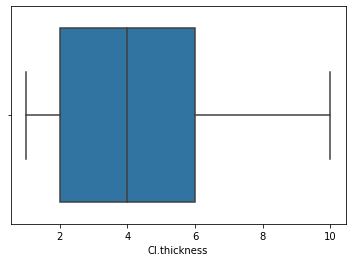

In [18]:
sns.boxplot(df_encode['Cl.thickness'])

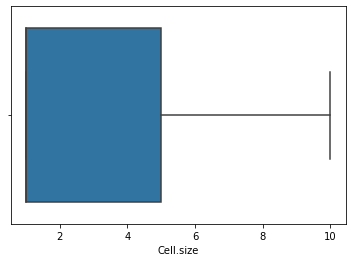

In [19]:
sns.boxplot(df_encode['Cell.size'])

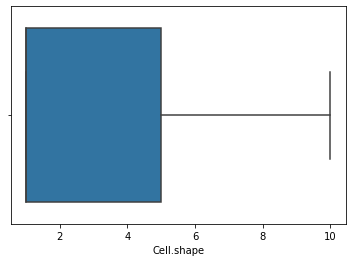

In [20]:
sns.boxplot(df_encode['Cell.shape'])

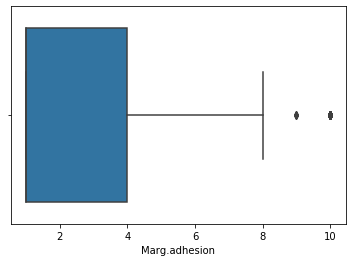

In [21]:
sns.boxplot(df_encode['Marg.adhesion'])

In [22]:
df_encode['Marg.adhesion'].quantile(0.75)+((df_encode['Marg.adhesion'].quantile(0.75)-df_encode['Marg.adhesion'].quantile(0.25))*1.5)

8.5

In [23]:
df_encode[df_encode['Marg.adhesion']>8].shape

(59, 10)

In [25]:
df_encode_ma = df_encode[df_encode['Marg.adhesion']>8]
df_encode_ma.Class_malignant.value_counts()

1    58
0     1
Name: Class_malignant, dtype: int64

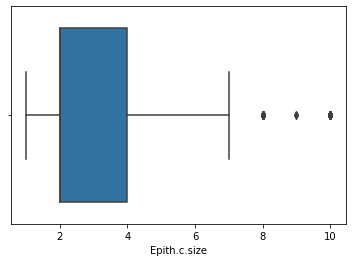

In [26]:
sns.boxplot(df_encode['Epith.c.size'])

In [27]:
df_encode['Epith.c.size'].quantile(0.75)+((df_encode['Epith.c.size'].quantile(0.75)-df_encode['Epith.c.size'].quantile(0.25))*1.5)

7.0

In [28]:
df_encode[df_encode['Epith.c.size']>7].shape

(54, 10)

In [29]:
df_encode_ecs = df_encode[df_encode['Epith.c.size']>7]
df_encode_ecs.Class_malignant.value_counts()

1    51
0     3
Name: Class_malignant, dtype: int64

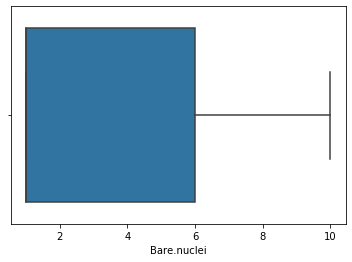

In [30]:
sns.boxplot(df_encode['Bare.nuclei'])

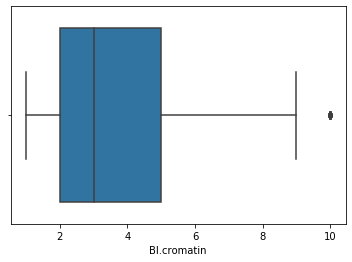

In [31]:
sns.boxplot(df_encode['Bl.cromatin'])

In [32]:
df_encode['Bl.cromatin'].quantile(0.75)+((df_encode['Bl.cromatin'].quantile(0.75)-df_encode['Bl.cromatin'].quantile(0.25))*1.5)

9.5

In [33]:
df_encode[df_encode['Bl.cromatin']>9].shape

(20, 10)

In [34]:
df_encode_bc = df_encode[df_encode['Bl.cromatin']>9]
df_encode_bc.Class_malignant.value_counts()

1    20
Name: Class_malignant, dtype: int64

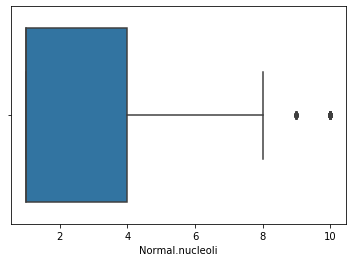

In [35]:
sns.boxplot(df_encode['Normal.nucleoli'])

In [36]:
df_encode['Normal.nucleoli'].quantile(0.75)+((df_encode['Normal.nucleoli'].quantile(0.75)-df_encode['Normal.nucleoli'].quantile(0.25))*1.5)

8.5

In [37]:
df_encode[df_encode['Normal.nucleoli']>8].shape

(75, 10)

In [38]:
df_encode_nn = df_encode[df_encode['Normal.nucleoli']>8]
df_encode_nn.Class_malignant.value_counts()

1    75
Name: Class_malignant, dtype: int64

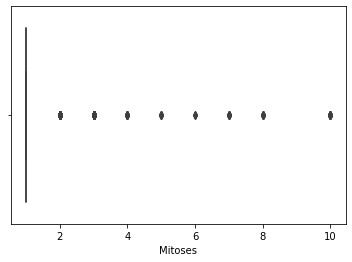

In [39]:
sns.boxplot(df_encode['Mitoses'])

In [40]:
df_encode.Mitoses.quantile(0.75)+((df_encode.Mitoses.quantile(0.75)-df_encode.Mitoses.quantile(0.25))*1.5)

1.0

In [41]:
df_encode[df_encode.Mitoses>1].shape

(120, 10)

In [43]:
df_encode_M = df_encode[df_encode.Mitoses>1]
df_encode_M.Class_malignant.value_counts()

1    107
0     13
Name: Class_malignant, dtype: int64

In [44]:
df_encode.Class_malignant.value_counts()

0    444
1    239
Name: Class_malignant, dtype: int64

In [45]:
Z = df_encode.corr()

In [46]:
Z.to_excel('E:\\data Science\\datasets\\corr.xls')

In [47]:
Y = df_encode.Class_malignant

In [48]:
Y.shape

(683,)

In [49]:
X = df_encode.drop(['Class_malignant'],axis=1)

In [50]:
X.shape

(683, 9)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 550)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression().fit(X_train,Y_train)

In [55]:
model.coef_

array([[ 0.38479192, -0.17023617,  0.48777361,  0.37275558,  0.17371852,
         0.33376258,  0.43955242,  0.18969178,  0.36008175]])

In [57]:
y_pred = model.predict(X_test)

In [63]:
from sklearn import metrics

In [67]:
cnf_mat = metrics.confusion_matrix(Y_test,y_pred)
print(cnf_mat)
print('Acc:',metrics.accuracy_score(Y_test,y_pred))
print('recall:',metrics.recall_score(Y_test,y_pred))
print('precision:',metrics.precision_score(Y_test,y_pred))
print("AUC:",metrics.roc_auc_score(Y_test,y_pred))

[[129   1]
 [  4  71]]
Acc: 0.975609756097561
recall: 0.9466666666666667
precision: 0.9861111111111112
AUC: 0.9694871794871796
